<a href="https://colab.research.google.com/github/Jubi-Wismi/hands-on-sql-3086685/blob/main/AnimalDectection90final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix



# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


print(tf.__version__)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


2.12.0


In [ ]:
# !pip install --upgrade tensorflow
# !pip install --upgrade keras

In [ ]:
#path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
path = "/content/drive/MyDrive/animals"


data = {"imgpath": [] , "labels": [] }

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path , folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)


df = pd.DataFrame(data)

#Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [ ]:
df

imgpath labels  encoded_labels
0     /content/drive/MyDrive/animals/zebra/170fd0528...  zebra              89
1     /content/drive/MyDrive/animals/zebra/0f6629e91...  zebra              89
2     /content/drive/MyDrive/animals/zebra/0c3b8c44a...  zebra              89
3     /content/drive/MyDrive/animals/zebra/3c9749353...  zebra              89
4     /content/drive/MyDrive/animals/zebra/470f42746...  zebra              89
...                                                 ...    ...             ...
5395  /content/drive/MyDrive/animals/bee/6bf580fcf5.jpg    bee               4
5396  /content/drive/MyDrive/animals/bee/7c3bc627c6.jpg    bee               4
5397  /content/drive/MyDrive/animals/bee/95c62debad.jpg    bee               4
5398  /content/drive/MyDrive/animals/bee/9e3c9b326e.jpg    bee               4
5399  /content/drive/MyDrive/animals/bee/9ade223a4d.jpg    bee               4

[5400 rows x 3 columns]

In [ ]:
train_df, Temp_df = train_test_split(df,  train_size= 0.70 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.70 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# print(train_df.shape)
# print(valid_df.shape)
# print(test_df.shape)

print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath       labels
0  /content/drive/MyDrive/animals/grasshopper/2cc...  grasshopper
1  /content/drive/MyDrive/animals/seal/7fd13ce3c2...         seal
2  /content/drive/MyDrive/animals/octopus/71d0d2b...      octopus
3  /content/drive/MyDrive/animals/wolf/0387df115d...         wolf
4  /content/drive/MyDrive/animals/okapi/8c36694b9...        okapi
(3779, 3)
--------Validation----------
                                             imgpath          labels
0  /content/drive/MyDrive/animals/raccoon/1f01736...         raccoon
1  /content/drive/MyDrive/animals/grasshopper/23e...     grasshopper
2  /content/drive/MyDrive/animals/dolphin/0e7f908...         dolphin
3  /content/drive/MyDrive/animals/donkey/3ea2e014...          donkey
4  /content/drive/MyDrive/animals/pelecaniformes/...  pelecaniformes
(1134, 3)
----------Test--------------
                                             imgpath  labels
0  /content/drive/MyDr

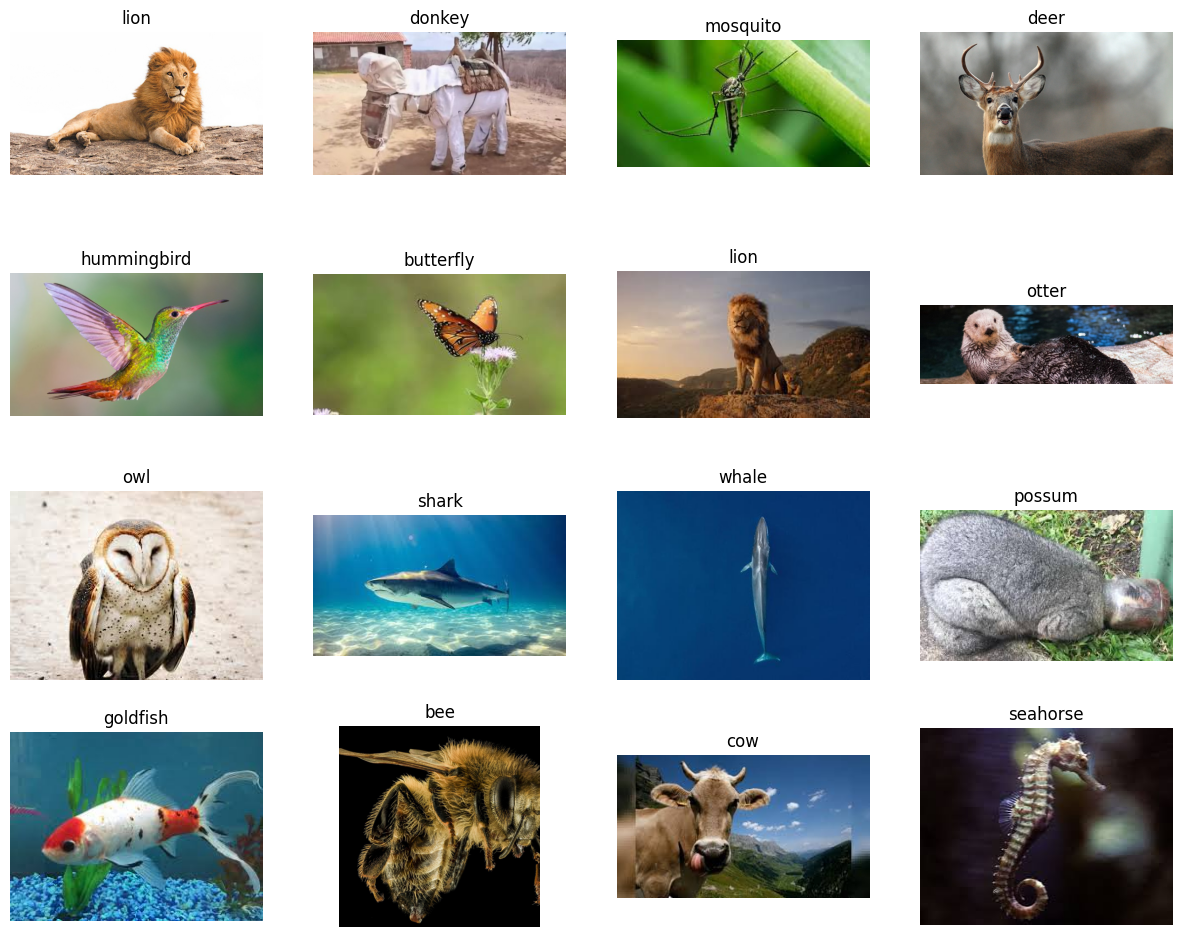

In [ ]:
plt.figure(figsize=(15,12))
for i, row in test_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [ ]:
# df.shape()

In [ ]:
# %%time

# BATCH_SIZE = 32
# IMAGE_SIZE = (224, 224)

# generator = ImageDataGenerator(
#     preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
#     # there could be image augmentation here
# )


# # Split the data into three categories.
# train_images = generator.flow_from_dataframe(
#     dataframe=train_df,
#     x_col='imgpath',
#     y_col='labels',
#     target_size=IMAGE_SIZE,
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     seed=42,
# )

# val_images = generator.flow_from_dataframe(
#     dataframe=valid_df,
#     x_col='imgpath',
#     y_col='labels',
#     target_size=IMAGE_SIZE,
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=BATCH_SIZE,
#     shuffle=False
# )

# test_images = generator.flow_from_dataframe(
#     dataframe=test_df,
#     x_col='imgpath',
#     y_col='labels',
#     target_size=IMAGE_SIZE,
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=BATCH_SIZE,
#     shuffle=False
# )

Found 3779 validated image filenames belonging to 90 classes.
Found 1134 validated image filenames belonging to 90 classes.
Found 487 validated image filenames belonging to 90 classes.
CPU times: user 179 ms, sys: 174 ms, total: 354 ms
Wall time: 1.82 s


In [ ]:
# # Load the pretained model
# pretrained_model = tf.keras.applications.EfficientNetB3(
#     input_shape=(224, 224,3),
#     include_top=False, # we don`t need a pre-trained top layer (output layer)
#     weights='imagenet',
#     pooling='max'
# )

# # Freezing the layers of a pretrained neural network
# for i, layer in enumerate(pretrained_model.layers):
#     pretrained_model.layers[i].trainable = False


43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
%%time
from tensorflow.keras.applications.resnet50 import preprocess_input


BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)



generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # other image augmentation settings
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3779 validated image filenames belonging to 90 classes.
Found 1134 validated image filenames belonging to 90 classes.
Found 487 validated image filenames belonging to 90 classes.
CPU times: user 205 ms, sys: 116 ms, total: 321 ms
Wall time: 2.92 s


In [ ]:
import tensorflow as tf

# Load a different pretrained model, for example, ResNet50
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Freeze the layers of the pretrained model
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False


In [ ]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.15),
  layers.experimental.preprocessing.RandomZoom(0.15),
  # layers.experimental.preprocessing.RandomContrast(0.15),
], name='AugmentationLayer')



inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(256)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(num_classes)(x)



outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x)
 # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)



model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint')
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                           

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=10,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint')

Epoch 1/10
119/119 [==============================] - 2291s 19s/step - loss: 3.4785 - accuracy: 0.2300 - val_loss: 1.9405 - val_accuracy: 0.4894 - lr: 5.0000e-04
Epoch 2/10
119/119 [==============================] - 1601s 13s/step - loss: 1.7310 - accuracy: 0.6017 - val_loss: 1.1391 - val_accuracy: 0.7099 - lr: 5.0000e-04
Epoch 3/10
119/119 [==============================] - 1587s 13s/step - loss: 1.2363 - accuracy: 0.7147 - val_loss: 0.8541 - val_accuracy: 0.7892 - lr: 5.0000e-04
Epoch 4/10
119/119 [==============================] - 1593s 13s/step - loss: 0.9646 - accuracy: 0.7730 - val_loss: 0.7446 - val_accuracy: 0.8228 - lr: 5.0000e-04
Epoch 5/10
119/119 [==============================] - 1588s 13s/step - loss: 0.7845 - accuracy: 0.8193 - val_loss: 0.6527 - val_accuracy: 0.8492 - lr: 5.0000e-04
Epoch 6/10
119/119 [==============================] - 1554s 13s/step - loss: 0.6875 - accuracy: 0.8346 - val_loss: 0.6012 - val_accuracy: 0.8589 - lr: 5.0000e-04
Epoch 7/10
119/119 [========

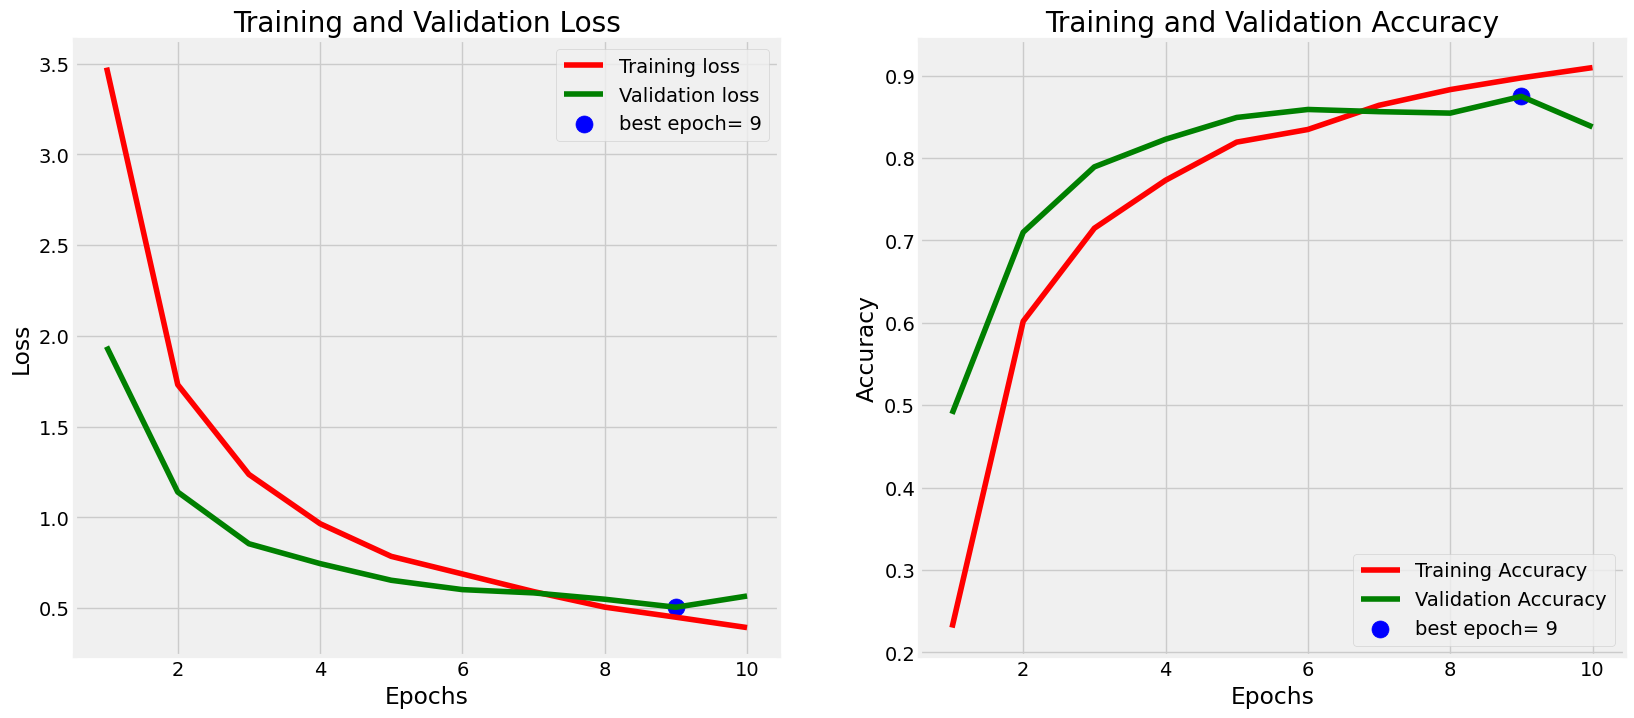

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
pretrained_model.trainable = True
for layer in pretrained_model.layers:
    if isinstance(layer, layers.BatchNormalization): # set BatchNorm layers as not trainable
        layer.trainable = False

# let`s see first 10 layers
for l in pretrained_model.layers[:10]:
    print(l.name, l.trainable)

model.compile(
    optimizer=Adam(0.00001), # fine tuning requires very little learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint')
print(model.summary())
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=15,
    callbacks=[
        EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 3,
                               restore_best_weights = True), # if val loss decreases for 5 epochs in a row, stop training,
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint')

input_3 True
conv1_pad True
conv1_conv True
conv1_bn False
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn False
conv2_block1_1_relu True
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequenti  (None, None, None, None)  0        
 al)                                                             
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
           

KeyboardInterrupt: ignored

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


In [ ]:
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

16/16 [==============================] - 215s 14s/step
F1 Score: 0.8110242175360854
                precision    recall  f1-score   support

      antelope       0.88      0.88      0.88         8
        badger       1.00      0.40      0.57         5
           bat       0.75      1.00      0.86         3
          bear       0.83      0.83      0.83         6
           bee       1.00      0.67      0.80         3
        beetle       1.00      0.86      0.92         7
         bison       0.67      0.86      0.75         7
          boar       1.00      1.00      1.00         4
     butterfly       0.71      0.71      0.71         7
           cat       1.00      1.00      1.00         2
   caterpillar       1.00      0.50      0.67         6
    chimpanzee       0.75      1.00      0.86         3
     cockroach       1.00      1.00      1.00         4
           cow       0.80      0.57      0.67         7
        coyote       1.00      0.71      0.83         7
          crab     

In [ ]:
classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))),
                            "Test Labels" : test_images.labels,
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                           })
Predictions.head(8)

16/16 [==============================] - 151s 9s/step


Image Index  Test Labels Test Classes  Prediction Labels  \
0            0           14       coyote                 14   
1            1            1       badger                  1   
2            2           81         swan                 81   
3            3            7         boar                  7   
4            4           20       donkey                 20   
5            5           29     goldfish                 29   
6            6           53        okapi                 53   
7            7           28         goat                 28   

  Prediction Classes                                               Path  \
0             coyote  /content/drive/MyDrive/animals/coyote/81f495ab...   
1             badger  /content/drive/MyDrive/animals/badger/68d85c37...   
2               swan  /content/drive/MyDrive/animals/swan/3d41996928...   
3               boar  /content/drive/MyDrive/animals/boar/149cf25549...   
4             donkey  /content/drive/MyDrive/animals/donkey/102a41e3...   
5           goldfish  /content/drive/MyDrive/animals/goldfish/0f6446...   
6              okapi  /content/drive/MyDrive/animals/okapi/8e737aeec...   
7               goat  /content/drive/MyDrive/animals/goat/9ffa8a9f5f...   

   Prediction Probability  
0                0.790793  
1                0.870170  
2                0.929498  
3                0.999539  
4                0.769710  
5                0.997693  
6                0.911724  
7                0.746279

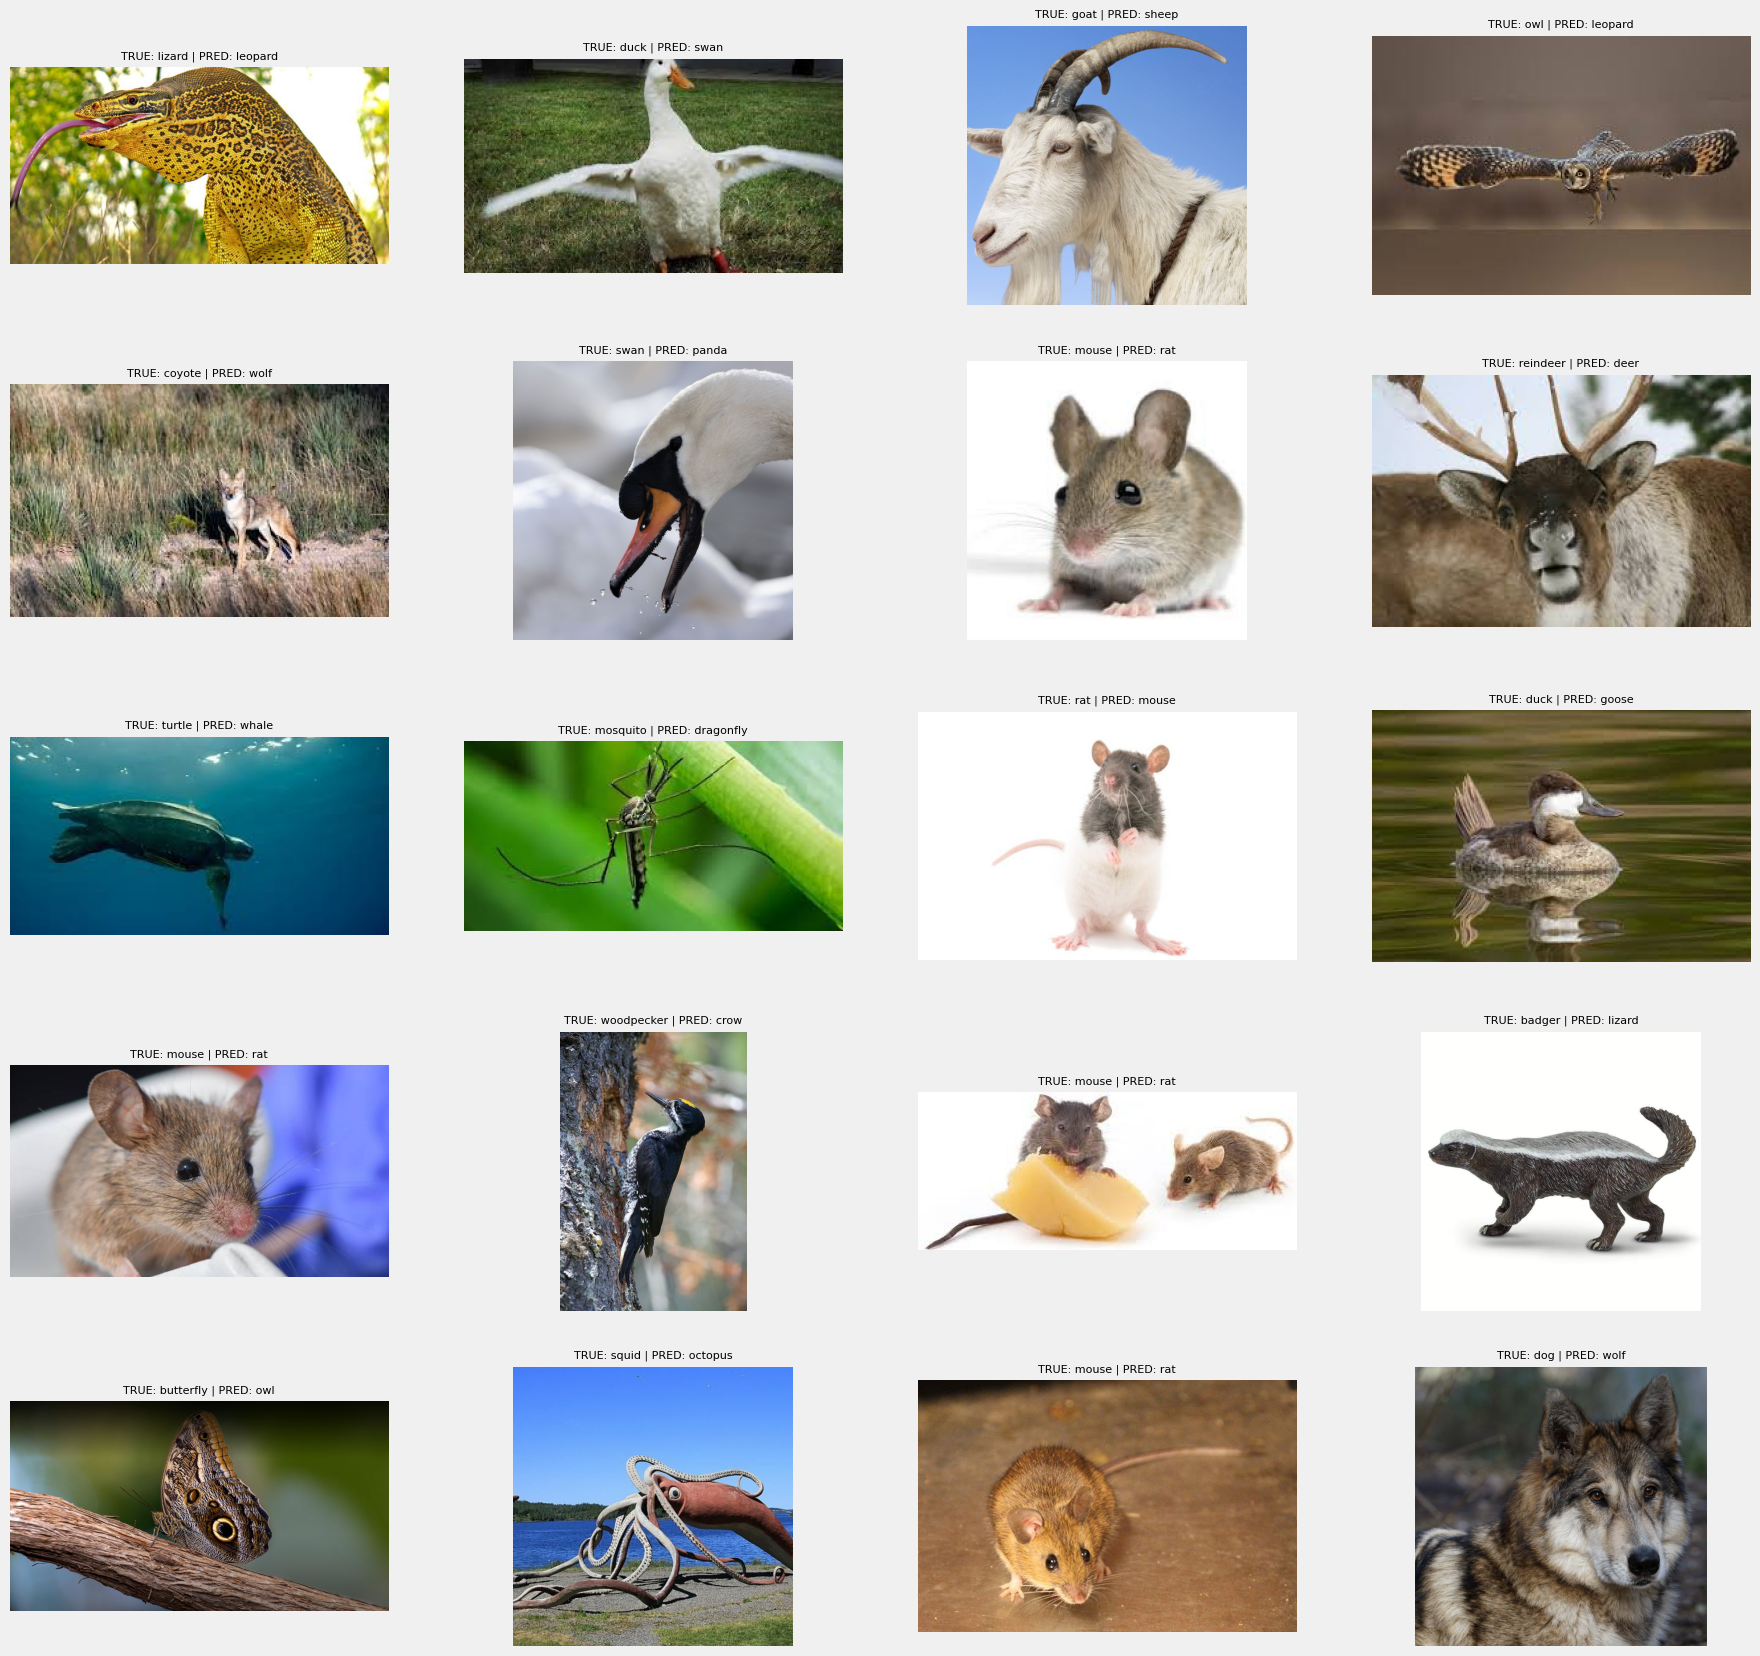

In [ ]:
plt.figure(figsize=(20,20))
for i, row in Predictions[Predictions["Test Labels"] != Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    plt.subplot(5,4,i+1)
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

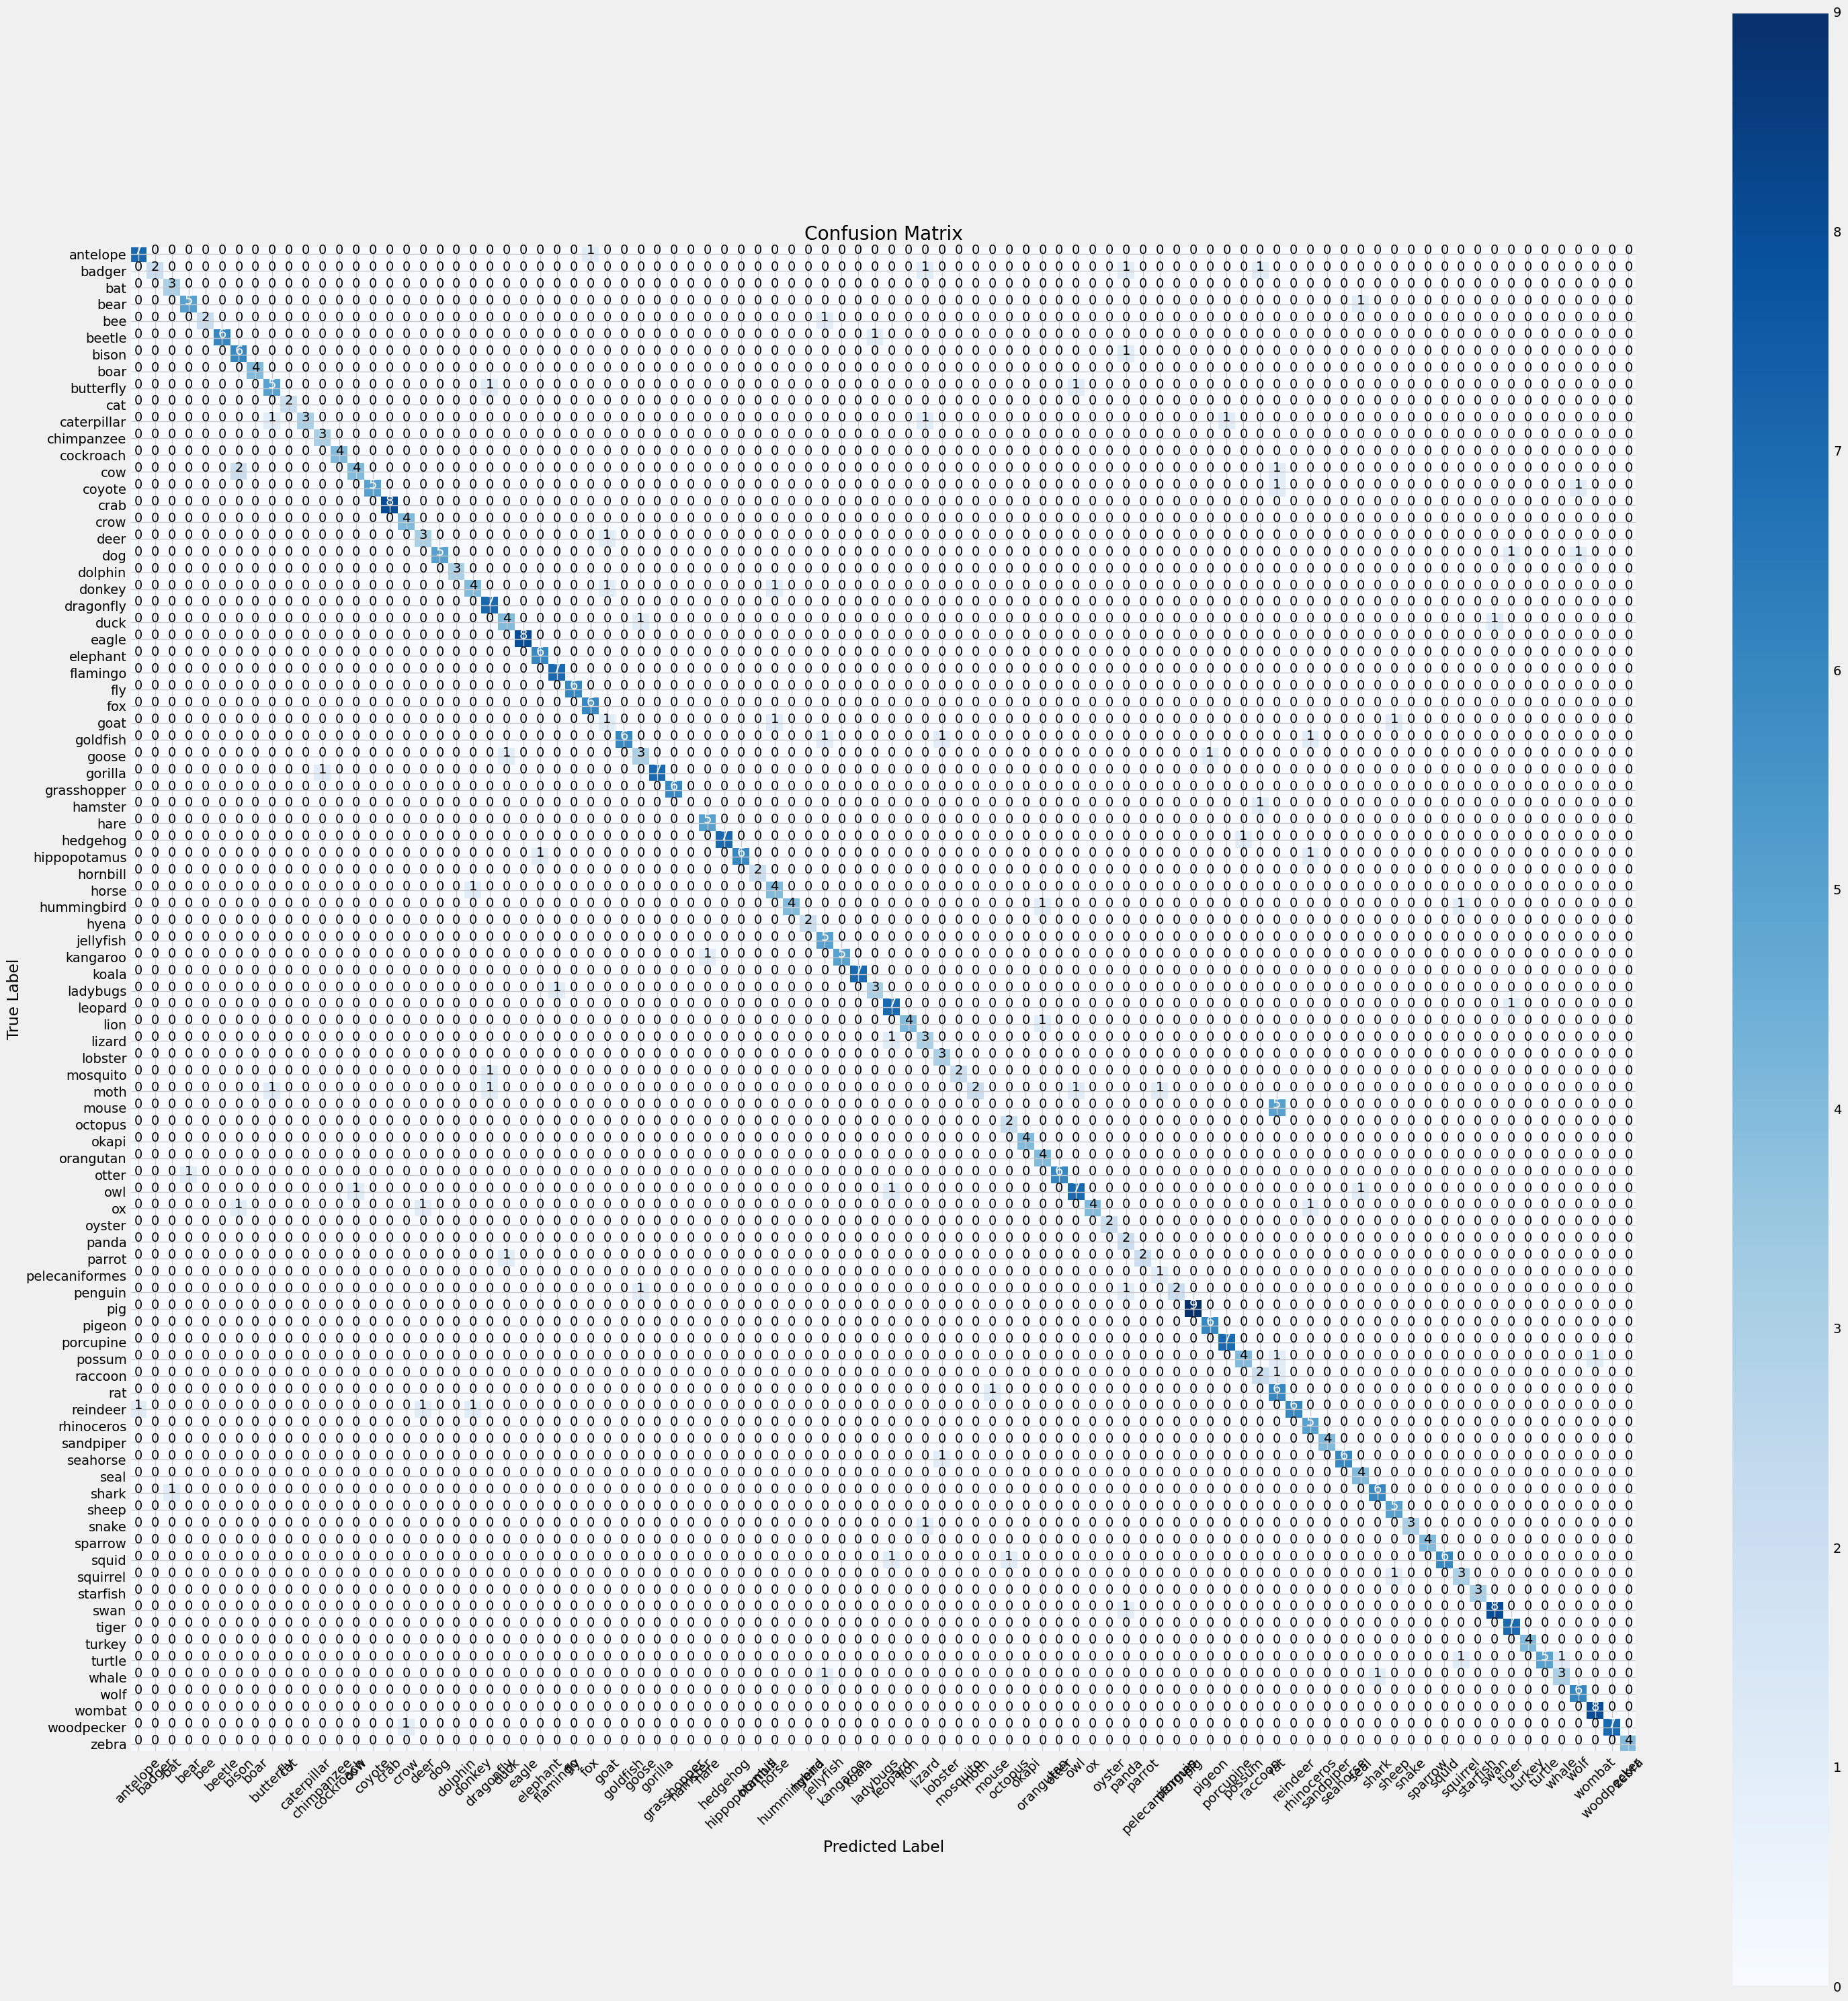

In [ ]:
preds = model.predict_generator(test_images)
y_pred = np.argmax(preds, axis=1)
g_dict = test_images.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_images.classes, y_pred)

plt.figure(figsize= (30, 30))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()